In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("data_SUBANDI.csv")
df

,hum,suhu,jarak,beda,status
0,58.0,24.7,14.26,14.26,surut
1,59.0,24.7,13.28,-0.99,banjir
2,60.0,24.7,13.24,-0.03,banjir
3,60.0,24.7,13.28,0.03,banjir
4,60.0,24.7,13.57,0.29,banjir
...,...,...,...,...,...
5992,37.6,30.5,30.02,0.00,normal
5993,37.4,30.5,30.02,0.00,normal
5994,37.2,30.5,30.02,0.00,normal
5995,37.2,30.5,30.02,0.00,normal


In [4]:
df1 = pd.read_csv("dataJarak.csv")
df1

,hum,suhu,jarak,beda,status
0,30.7,26.7,33.93,33.93,banjir
1,30.7,26.7,34.19,0.26,banjir
2,30.6,26.7,34.19,0.00,banjir
3,30.5,26.6,33.66,-0.53,banjir
4,30.7,26.6,33.66,0.00,banjir
...,...,...,...,...,...
2888,30.5,26.1,35.24,0.02,surut
2889,30.7,26.0,35.26,0.02,surut
2890,30.7,26.0,35.26,0.00,surut
2891,30.7,26.0,35.26,0.00,surut


In [59]:
df2 = pd.read_csv("pot_log_hujan.csv")
df2

,timestamp,hum,suhu,jarak,status
0,12/9/2025 15:43,35.1,29.3,2.84,hujan
1,12/9/2025 15:43,35.1,29.3,2.84,hujan
2,12/9/2025 15:43,35.1,29.3,2.84,hujan
3,12/9/2025 15:43,35.1,29.3,2.84,hujan
4,12/9/2025 15:43,35.1,29.3,12.85,hujan
...,...,...,...,...,...
186,12/9/2025 15:49,100.0,25.6,4.13,hujan
187,12/9/2025 15:49,100.0,25.6,4.13,hujan
188,12/9/2025 15:49,100.0,25.6,4.13,hujan
189,12/9/2025 15:49,100.0,25.6,4.13,hujan


In [60]:
df3 = pd.read_csv("pot_log_banjir.csv")
df3

,timestamp,hum,suhu,jarak,label
0,12/9/2025 16:10,61.0,31.9,36.40,banjir
1,12/9/2025 16:10,61.2,31.9,56.41,banjir
2,12/9/2025 16:10,61.4,31.9,33.35,banjir
3,12/9/2025 16:10,61.6,31.9,34.90,banjir
4,12/9/2025 16:10,61.7,31.9,33.35,banjir
...,...,...,...,...,...
118,12/9/2025 16:14,60.7,32.0,13.87,banjir
119,12/9/2025 16:14,60.7,32.0,13.53,banjir
120,12/9/2025 16:14,60.7,32.0,13.53,banjir
121,12/9/2025 16:14,60.7,32.0,13.89,banjir


In [68]:
df4 = pd.read_csv("pot_log_banjirhujan.csv")
df4

,timestamp,hum,suhu,jarak,status
0,12/9/2025 16:16,64.8,31.8,28.65,banjir2
1,12/9/2025 16:16,64.9,31.8,28.65,banjir2
2,12/9/2025 16:16,64.9,31.8,28.36,banjir2
3,12/9/2025 16:16,65.0,31.8,27.78,banjir2
4,12/9/2025 16:16,65.2,31.9,27.78,banjir2
...,...,...,...,...,...
70,12/9/2025 16:18,100.0,29.7,13.53,banjir2
71,12/9/2025 16:18,100.0,29.7,13.53,banjir2
72,12/9/2025 16:18,100.0,29.7,13.87,banjir2
73,12/9/2025 16:18,100.0,29.6,13.87,banjir2


In [21]:
print(df.dtypes)

hum       float64
suhu      float64
jarak     float64
beda      float64
status     object
dtype: object


In [6]:
df = pd.concat([df1], ignore_index=True)
df

,hum,suhu,jarak,beda,status
0,30.7,26.7,33.93,33.93,banjir
1,30.7,26.7,34.19,0.26,banjir
2,30.6,26.7,34.19,0.00,banjir
3,30.5,26.6,33.66,-0.53,banjir
4,30.7,26.6,33.66,0.00,banjir
...,...,...,...,...,...
2888,30.5,26.1,35.24,0.02,surut
2889,30.7,26.0,35.26,0.02,surut
2890,30.7,26.0,35.26,0.00,surut
2891,30.7,26.0,35.26,0.00,surut


In [83]:
print(df1.dtypes)

hum       object
suhu      object
jarak     object
status    object
dtype: object


In [111]:
df['hum'] = pd.to_numeric(df['hum'], errors='coerce')
df['suhu'] = pd.to_numeric(df['suhu'], errors='coerce')
df['jarak'] = pd.to_numeric(df['jarak'], errors='coerce')


In [9]:
print(df.dtypes)

hum       float64
suhu      float64
jarak     float64
beda      float64
status     object
dtype: object


In [7]:
df1 = df1.drop(['status'],axis=1)
df1

,hum,suhu,jarak,beda
0,30.7,26.7,33.93,33.93
1,30.7,26.7,34.19,0.26
2,30.6,26.7,34.19,0.00
3,30.5,26.6,33.66,-0.53
4,30.7,26.6,33.66,0.00
...,...,...,...,...
2888,30.5,26.1,35.24,0.02
2889,30.7,26.0,35.26,0.02
2890,30.7,26.0,35.26,0.00
2891,30.7,26.0,35.26,0.00


In [115]:
df1['hum'] = pd.to_numeric(df1['hum'], errors='coerce')
df1['suhu'] = pd.to_numeric(df1['suhu'], errors='coerce')
df1['jarak'] = pd.to_numeric(df1['jarak'], errors='coerce')


In [116]:
print(df1.dtypes)

hum      float64
suhu     float64
jarak    float64
dtype: object


In [11]:
df.isna().sum()

hum       1
suhu      1
jarak     1
beda      1
status    1
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

hum       0
suhu      0
jarak     0
beda      0
status    0
dtype: int64

In [9]:
df_original = df1.copy()
df_original

,hum,suhu,jarak,beda
0,30.7,26.7,33.93,33.93
1,30.7,26.7,34.19,0.26
2,30.6,26.7,34.19,0.00
3,30.5,26.6,33.66,-0.53
4,30.7,26.6,33.66,0.00
...,...,...,...,...
2888,30.5,26.1,35.24,0.02
2889,30.7,26.0,35.26,0.02
2890,30.7,26.0,35.26,0.00
2891,30.7,26.0,35.26,0.00


In [120]:
file_path = "datates1.csv"

df.to_csv(
        file_path,
        index=False,           # Do not write row indices
        encoding="utf-8",      # Ensure UTF-8 encoding
        sep=",",               # CSV delimiter
        quoting=1              # Quote non-numeric fields (csv.QUOTE_NONNUMERIC = 2, QUOTE_MINIMAL = 0, QUOTE_ALL = 1)
    )

In [10]:
df1

,hum,suhu,jarak,beda
0,30.7,26.7,33.93,33.93
1,30.7,26.7,34.19,0.26
2,30.6,26.7,34.19,0.00
3,30.5,26.6,33.66,-0.53
4,30.7,26.6,33.66,0.00
...,...,...,...,...
2888,30.5,26.1,35.24,0.02
2889,30.7,26.0,35.26,0.02
2890,30.7,26.0,35.26,0.00
2891,30.7,26.0,35.26,0.00


In [124]:
df= df.drop(['status'], axis=1)
df

,hum,suhu,jarak
0,31.4,29.5,29.77
1,31.4,29.5,29.77
2,31.4,29.5,29.77
3,31.4,29.5,29.77
4,31.4,29.5,29.77
...,...,...,...
4644,37.6,30.5,30.02
4645,37.4,30.5,30.02
4646,37.2,30.5,30.02
4647,37.2,30.5,30.02


In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [60]:
df

,hum,suhu,jarak
0,31.40,29.50,29.77
1,31.40,29.50,29.77
2,31.40,29.50,29.77
3,31.40,29.50,29.77
4,31.40,29.50,29.77
...,...,...,...
4644,37.60,30.50,30.02
4645,37.40,30.50,30.02
4646,37.20,30.50,30.02
4647,37.20,30.50,30.02


In [95]:
print(df.dtypes)

hum      float64
suhu     float64
jarak    float64
dtype: object


In [11]:
df.interpolate(method='linear', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9680\2868764835.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [12]:
df

,hum,suhu,jarak,beda,status
0,30.7,26.7,33.93,33.93,banjir
1,30.7,26.7,34.19,0.26,banjir
2,30.6,26.7,34.19,0.00,banjir
3,30.5,26.6,33.66,-0.53,banjir
4,30.7,26.6,33.66,0.00,banjir
...,...,...,...,...,...
2888,30.5,26.1,35.24,0.02,surut
2889,30.7,26.0,35.26,0.02,surut
2890,30.7,26.0,35.26,0.00,surut
2891,30.7,26.0,35.26,0.00,surut


In [123]:
cek_kolom = ['hum','suhu','jarak']

total_replaced = 0

for kolom in cek_kolom:
  Q1 = df[kolom].quantile(0.20)
  Q3 = df[kolom].quantile(0.80)
  IQR = Q3 - Q1

  outlier = (df[kolom] < (Q1 - 1.5 * IQR)) | (df[kolom] > (Q3 + 1.5 * IQR))

  total_replaced += outlier.sum()

  df.loc[outlier, kolom] = np.nan

display(total_replaced)

np.int64(0)

In [105]:
df

,hum,suhu,jarak
0,0.314,0.879032,0.610274
1,0.314,0.879032,0.610274
2,0.314,0.879032,0.610274
3,0.314,0.879032,0.610274
4,0.314,0.879032,0.610274
...,...,...,...
4644,0.376,0.959677,0.615232
4645,0.374,0.959677,0.615232
4646,0.372,0.959677,0.615232
4647,0.372,0.959677,0.615232


In [127]:
df['status']=df_original['status']
df 

KeyError: 'status'

In [100]:
df = df.interpolate(method='linear')
df_interpolated = df.copy()

In [101]:
scaler = MinMaxScaler()

df[['hum', 'suhu', 'jarak']] = scaler.fit_transform(df[['hum', 'suhu', 'jarak']])

df

,hum,suhu,jarak
0,0.314,0.879032,0.610274
1,0.314,0.879032,0.610274
2,0.314,0.879032,0.610274
3,0.314,0.879032,0.610274
4,0.314,0.879032,0.610274
...,...,...,...
4644,0.376,0.959677,0.615232
4645,0.374,0.959677,0.615232
4646,0.372,0.959677,0.615232
4647,0.372,0.959677,0.615232


In [103]:
df.dtypes

hum      float64
suhu     float64
jarak    float64
dtype: object

In [104]:
df

,hum,suhu,jarak
0,0.314,0.879032,0.610274
1,0.314,0.879032,0.610274
2,0.314,0.879032,0.610274
3,0.314,0.879032,0.610274
4,0.314,0.879032,0.610274
...,...,...,...
4644,0.376,0.959677,0.615232
4645,0.374,0.959677,0.615232
4646,0.372,0.959677,0.615232
4647,0.372,0.959677,0.615232


<Axes: xlabel='timestamp', ylabel='suhu'>

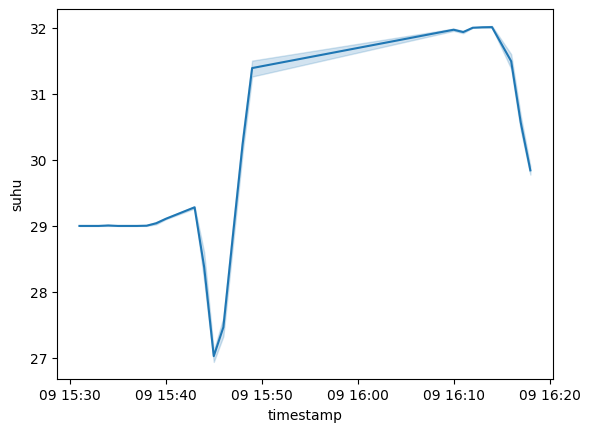

In [37]:
sns.lineplot(x='timestamp', y='suhu', data=df_interpolated)

<Axes: xlabel='timestamp', ylabel='hum'>

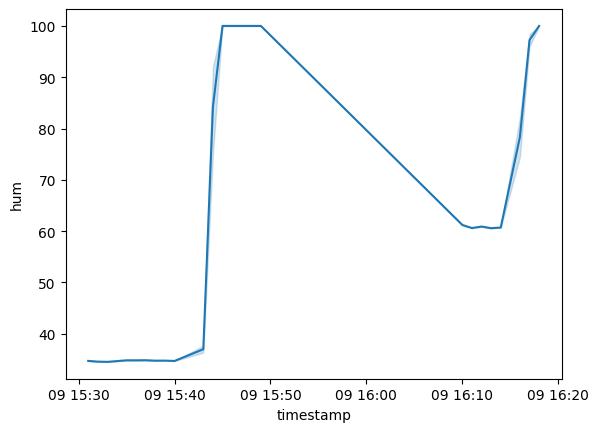

In [38]:
sns.lineplot(x='timestamp', y='hum', data=df_interpolated)

In [4]:
df

,hum,suhu,jarak,beda,status
0,58.0,24.7,14.26,14.26,surut
1,59.0,24.7,13.28,-0.99,banjir
2,60.0,24.7,13.24,-0.03,banjir
3,60.0,24.7,13.28,0.03,banjir
4,60.0,24.7,13.57,0.29,banjir
...,...,...,...,...,...
5992,37.6,30.5,30.02,0.00,normal
5993,37.4,30.5,30.02,0.00,normal
5994,37.2,30.5,30.02,0.00,normal
5995,37.2,30.5,30.02,0.00,normal


In [18]:
X = df[['hum','suhu','jarak','beda']]
y = df['status']

In [19]:
df

,hum,suhu,jarak,beda,status
0,58.0,24.7,14.26,14.26,surut
1,59.0,24.7,13.28,-0.99,banjir
2,60.0,24.7,13.24,-0.03,banjir
3,60.0,24.7,13.28,0.03,banjir
4,60.0,24.7,13.57,0.29,banjir
...,...,...,...,...,...
5992,37.6,30.5,30.02,0.00,normal
5993,37.4,30.5,30.02,0.00,normal
5994,37.2,30.5,30.02,0.00,normal
5995,37.2,30.5,30.02,0.00,normal


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # menjaga proporsi label
    random_state=42
)

print("Train size:", len(X_train))
print("Test size :", len(X_test))


Train size: 4796
Test size : 1200


In [22]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred = model.predict(X_test)



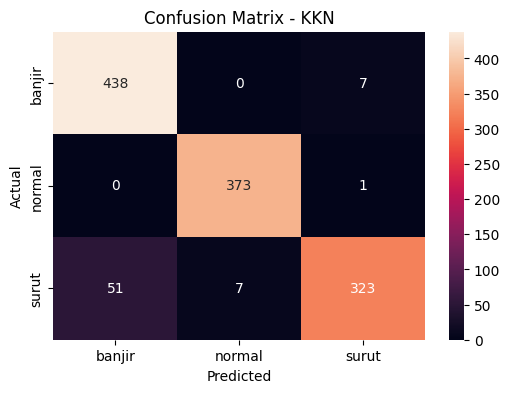


Classification Report:
              precision    recall  f1-score   support

      banjir       0.90      0.98      0.94       445
      normal       0.98      1.00      0.99       374
       surut       0.98      0.85      0.91       381

    accuracy                           0.94      1200
   macro avg       0.95      0.94      0.94      1200
weighted avg       0.95      0.94      0.94      1200



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



model.fit(X_train, y_train)
y_pred = model.predict(X_test)

    # Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=model.classes_,
                yticklabels=model.classes_)
plt.title(f"Confusion Matrix - KKN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

    # Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [24]:
import pickle

filename = 'model_SUBANDI.pkl'
with open(filename, 'wb') as file :
    pickle.dump(model, file)

<Axes: xlabel='timestamp', ylabel='jarak'>

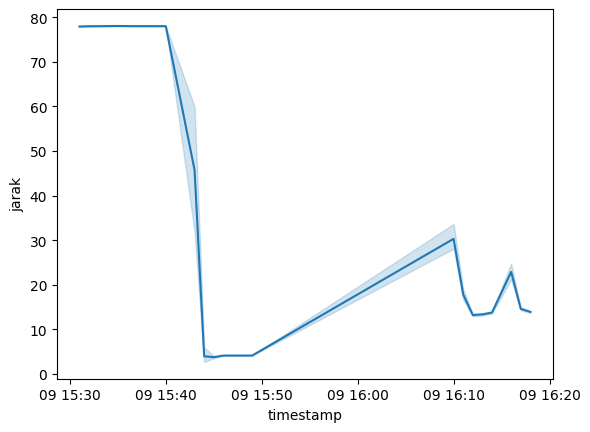

In [39]:
sns.lineplot(x='timestamp', y='jarak', data=df_interpolated)